<div>
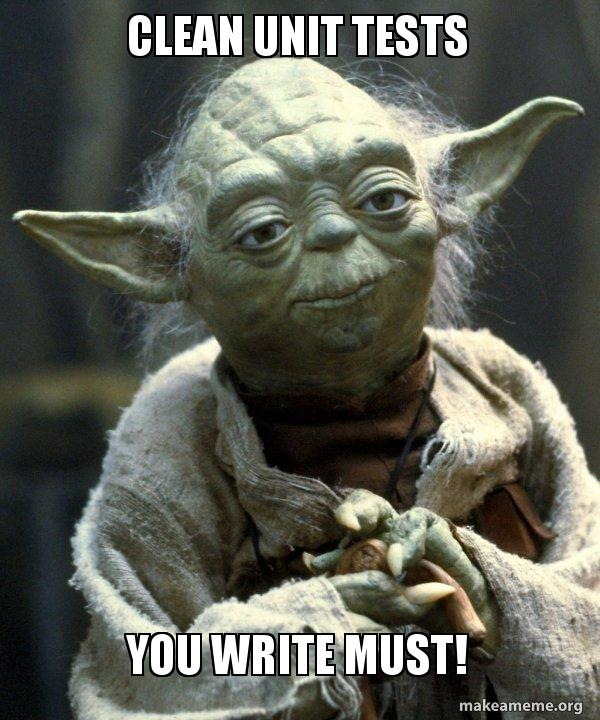
</div>

# Unit Test with `Pytest`
## Table of Contents
* [1. Set the Jupyter environment](#1.-Set-the-Jupyter-environment)
* [2. Python Mock Object Library](#2.-Python-Mock-Object-Library)
    * [2.1. What are Mock objects?](#2.1.-What-are-Mock-objects?)
    * [2.2. The Python `Mock` Library](#2.2.-The-Python-`Mock`-Library)
* [3. Creating a `Mock` Object](#3.-Creating-a-`Mock`-Object)
    * [3.1. Mock object attributes and methods](#3.1.-Mock-object-attributes-and-methods)
* [4. Mocking](#4.-Mocking)
    * [4.1. Mocking a function](#4.1.-Mocking-a-function)
    * [4.2. Mocking a method of a class](#4.2.-Mocking-a-method-of-a-class)
    * [4.3. Mocking a class](#4.3.-Mocking-a-class)
    * [4.4. Mocking an object's attributes](#4.4.-Mocking-an-object's-attributes)
* [5. Assertions and Inspection](#5.-Assertions-and-Inspection)
* [6. `return_value` and `side_effect`](#6.-return_value-and-side_effect)
    * [6.1. What if I don't use `return_value`?](#6.1.-What-if-I-don't-use-return_value?)
    * [6.2 Examples and uses](#6.2-Examples-and-uses)
        * [6.2.1. Chaining method calls](#6.2.1.-Chaining-method-calls)
        * [6.2.2. Testing method calls without caring about return values](#6.2.2.-Testing-method-calls-without-caring-about-return-values)
        * [6.2.3. Using side_effect instead of return_value.](#6.2.3.-Using-side_effect-instead-of-return_value.)
    * [6.3. `side_effect` can also be an iterable](#6.3.-`side_effect`-can-also-be-an-iterable)
    * [6.4. Exceptions using `side_effect`](#6.4.-Exceptions-using-`side_effect`)
* [7. Testing Exceptions with `pytest.raises`](#7.-Testing-Exceptions-with-`pytest.raises`)
* [8. Configuring Your Mock](#8.-Configuring-Your-Mock)
* [9. `patch()`](#9.-`patch()`)
    * [9.1. Using `patch()` as a decorator:](#9.1.-Using-`patch()`-as-a-decorator:)
    * [9.2. Using `patch()` as a context manager:](#9.2.-Using-patch()-as-a-context-manager:)
    * [9.3. Using `patch()` manually:](#9.3.-Using-patch()-manually:)
* [10. Patching an Object’s Attributes:](#10.-Patching-an-Object’s-Attributes:)
    * [10.1 Patching attributes and functions:](#10.1-Patching-attributes-and-functions:)
        * [10.1.1 Autospec](#10.1.1-Autospec)
        * [10.1.2 Cascading Decorators](#10.1.2-Cascading-Decorators)
    * [10.2. Patching classes and instances](#10.2.-Patching-classes-and-instances:)
    * [10.3 Where to Patch](#10.3-Where-to-Patch)
* [11. pytest fixtures](#11.-pytest-fixtures)
    * [11.1 Basic ficture usage](#11.1-Basic-ficture-usage)
    * [11.2 Fixture scope](#11.2-Fixture-scope)
    * [11.3. Fixture dependencies](#11.3.-Fixture-dependencies)
    * [11.4 Parametrized fixtures](#11.4-Parametrized-fixtures)
    * [11.5. Autouse fixtures](#11.5.-Autouse-fixtures)
* [12. Avoiding Common Problems Using Specifications](#12.-Avoiding-Common-Problems-Using-Specifications)
* [12. MagicMock vs Mock](#12.-MagicMock-vs-Mock)
    * [12.1. Mocking with `MagicMock`](#12.1.-Mocking-with-`MagicMock`)
* [13. Best Practices for Mocking and Patching](#13.-Best-Practices-for-Mocking-and-Patching)
    * [13.1. When to use Mock objects and patching](#13.1.-When-to-use-Mock-objects-and-patching)
    * [13.2. Keeping mocks simple and focused](#13.2.-Keeping-mocks-simple-and-focused)
    * [13.3. Testing edge cases and exceptions with `side_effect`](#13.3.-Testing-edge-cases-and-exceptions-with-`side_effect`)
    * [13.4. Cleaning up after patching](#13.4.-Cleaning-up-after-patching)

# 1. Set the Jupyter environment

Install `ipytest` by running:  
Notebook:
```jupyter
!pip install ipytest
```
Terminal:
```zsh
pip install ipytest
```

In [1]:
# import the library:
import ipytest
import pytest_mock
ipytest.autoconfig()

ModuleNotFoundError: No module named 'pytest_mock'

Afterwards in a new cell, tests can be executed as in:

In [68]:
%%ipytest

def test_example():
    assert [1, 2, 3] == [1, 2, 3]

.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.03s


In [69]:
%%ipytest -qq

def test_example():
    assert [1, 2, 3] == [1, 2]

F                                                                                            [100%]
============================================= FAILURES =============================================
___________________________________________ test_example ___________________________________________

    def test_example():
>       assert [1, 2, 3] == [1, 2]
E       assert [1, 2, 3] == [1, 2]
E         Left contains one more item: 3
E         Use -v to get more diff

/tmp/ipykernel_26046/98980655.py:2: AssertionError
-------------------------------------- Captured stdout setup ---------------------------------------
Setting up
------------------------------------- Captured stdout teardown -------------------------------------
Tearing down
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.loca

# 2. Python Mock Object Library

## 2.1. What are Mock objects?
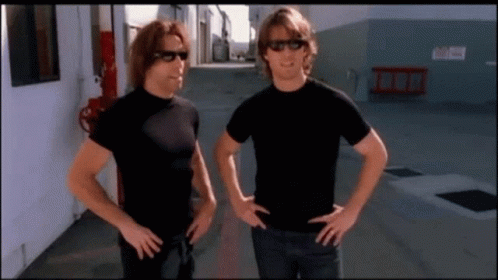
- **Simulate** the behavior of real objects in a controlled way.
- Enable **isolated** testing by replacing dependencies.
- Useful for **testing behavior** and **interactions with other components**.


Another reason to use mock objects is to better understand how you’re using their real counterparts in your code.
- If you called a method
- How you called the method
- How often you called the method

## 2.2. The Python `Mock` Library
`Mock` is part of the unittest library in Python.
```python
from unittest.mock import Mock
```

Have you seen `mocker.Mock`?

```python
def test_example(mocker):
    some_dependency = mocker.Mock() # <-----
    some_dependency.do_something.return_value = 'mocked result'
    result = my_function(some_dependency)    
    assert result == 'expected result'
    some_dependency.do_something.assert_called_once()
```
The mocker fixture is provided by the `pytest-mock` plugin, which is a thin wrapper around the `unittest.mock` library.

to use the `mocker`:
```bash
pip install pytest-mock
```

This fixture:
- simplifies the process of mocking and helps you to use the Mock object more effectively in your tests.
- **automatically resetting** the mocks after each test,
- reducing the chance of unintended side effects between tests.
- integration with pytest, meaning you can use `mocker` alonside other pytest features, like parametrization, xfail, amd markers.

# 3. Creating a `Mock` Object
We are going to start instantiating a new Mock instance:

In [70]:
from unittest.mock import Mock
mock_obj = Mock()

In [71]:
mock_obj.some_attribute

<Mock name='mock.some_attribute' id='140219870395264'>

In [72]:
mock_obj.do_something()

<Mock name='mock.do_something()' id='140219876531408'>

In [73]:
import json
json.dumps() # no arguments!

TypeError: dumps() missing 1 required positional argument: 'obj'

In [74]:
json = Mock()
json.dumps() # no errors!

<Mock name='mock.dumps()' id='140220214740736'>

## 3.1. Mock object attributes and methods

`return_value`
- set the value returned when the mock is called

In [76]:
%%ipytest

from unittest.mock import Mock

def test_example2():
    mock_object = Mock()
    mock_object.return_value = 50

    result = mock_object()
    assert result == 50

.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.03s


`side_effect`
- assigns a **function or exception** to be triggered when the mock object is called

In [79]:
%%ipytest -qq

def custom_side_effect(*args):
    return args[0] * 2

# pass or fail?
def test_example3():
    mock_function = Mock()
    mock_function.side_effect = custom_side_effect
    result = mock_function(21,33)
    assert result == 42

.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


Example **Exception**

In [80]:
%%ipytest -qq
from unittest.mock import Mock

def test_example4():
    mock_function = Mock()
    mock_function.side_effect = ValueError("Invalid value")
    try:
        result = mock_function()
    except ValueError as e:
        assert str(e) == "Invalid value"


.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


# 4. Mocking

Mock is versatile and can mock almost anythings in many different ways:
## 4.1. Mocking a function
create a mock object to replace a function and set the return value or side effect:

In [82]:
%%ipytest -qq
from unittest.mock import Mock

def function_example():
    return "return function"

def test_function_example():
    function_example = Mock()
    function_example.return_value = "mocked return function"

    result = function_example()
    assert result == "mocked return function"


.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


## 4.2. Mocking a method of a class
create a mock object for a method within a class:

In [83]:
%%ipytest -qq
from unittest.mock import Mock

class MyClass:
    def my_method(self):
        return "method result"


def test_my_class_my_method():
    # Create a mock object for the method
    mock_method = Mock()
    mock_method.return_value = "Mocked method result"

    # Replace the method with the mock object
    MyClass.my_method = mock_method

    # Create an instance of the class and call the mocked method
    result = MyClass().my_method()
    assert result == "Mocked method result"


.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


## 4.3. Mocking a class
create a mock object for the entire class:  

`Mock(spec=MyClass)` vs `Mock()`?

In [88]:
%%ipytest
from unittest.mock import Mock

class MyClass:
    def __init__(self, a):
        self.a = a
    def my_method(self):
        return "method result"

# pass or fail?
def test_my_class():
    # Create a mock object for the class
    from __main__ import MyClass
    
    mock_class = Mock(spec=MyClass)
#     mock_class = Mock()
    
    mock_class.my_method.return_value = "Mocked method result"

    MyClass = mock_class

    result = MyClass.my_method()
    
    assert result == "Mocked method result"


.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
1 passed, 1 warning in 0.05s


R: Using `Mock(spec=MyClass)` creates a mock object that is **restricted to the attributes and methods** of the MyClass class, ensuring that the mock object adheres to the expected interface.

Conversely, using `Mock()` creates a mock object without any restrictions on its attributes or methods, which can lead to **less strict tests**.

## 4.4. Mocking an object's attributes

Create a mock object to replace an attribute of another object:

In [89]:
%%ipytest -qq
from unittest.mock import Mock

class MyClass:
    def __init__(self):
        self.attribute = "attribute value"


def test_my_class_attr():
    # Create a mock object for the attribute
    mock_attribute = Mock()
    mock_attribute.return_value = "Mocked attribute value"

    # Create an instance of the class and replace the attribute with the mock object
    instance = MyClass()
    instance.attribute = mock_attribute

    # Access the mocked attribute and verify the return value
    result = instance.attribute()
    assert result == "Mocked attribute value"

# Another way...

def test_my_class_attr2():
    instance = MyClass()
    instance.attribute = Mock()
    instance.attribute.return_value = "Mocked attribute value"
    
    result = instance.attribute()
    assert result == "Mocked attribute value"
    
   

..                                                                                           [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


# 5. Assertions and Inspection
`Mock` instances store data on how you used them, you can see if you called a method, how you called and methos, and so on.


- assert_called
- assert_called_once
- assert_called_with
- assert_called_once_with
- assert_not_called


- _assert_ mocked_object.**call_count**

```
from unittest.mock import Mock, call
```
- _assert_ mocked_object.**call_args**
- _assert_ mocked_object.**call_args_list**
- _assert_ mocked_object.**method_calls**



In [91]:
%%ipytest -qq
from unittest.mock import Mock

def test_assertions1():
    import json
    json = Mock(spec=json)
    json.dumps.return_value = '{"a":"1"}'
    json.dumps({'a':'1'}) # to Json.
    
    json.dumps.assert_called()
    json.dumps.assert_called_once()
    json.dumps.assert_called_once_with({'a':'1'})
    json.loads.assert_not_called()

.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


In [93]:
%%ipytest -qq
from unittest.mock import Mock

def test_assertions2():
    import json
    json = Mock(spec=json)
    json.dumps.return_value = '{"a":"1"}'
    
    for _ in range(2):
        json.dumps({'a':'1'}) # to Json.
    
    assert json.dumps.call_count == 2

.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


In [94]:
%%ipytest -qq
from unittest.mock import Mock, call

def test_assertions3():
    import json
    json = Mock(spec=json)
    json.dumps.return_value = '{"a":"1"}'
    json.dumps({'a':'1'}) # to Json.
    
    assert json.dumps.call_args() == {'a':'1'}

.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


In [95]:
%%ipytest -qq
from unittest.mock import Mock, call

def test_assertions4():
    import json
    json = Mock(spec=json)

    json.dumps({'a':'1'}) # dict -> Json
    json.loads(b'{"b":"2"}') # Json -> dict
    
    assert json.method_calls == [
                                    call.dumps({'a': '1'}),
                                    call.loads(b'{"b":"2"}')
                                ]


.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


# 6. `return_value` and `side_effect`

## 6.1. What if I don't use `return_value`?

You can still mock an object without using `return_value`. If you don't set the `return_value`, the mock object will return another mock object when called. This can be useful in various scenarios:

1. Chaining method calls:
> When you have a series of method calls, you can use the default behavior of the mock object to create a chain of mock objects without explicitly setting the `return_value`.
2. Testing method calls without caring about return values.
> Sometimes, you only need to test whether a method or function is called with the correct arguments or the right number of times. In these cases, you don't need to set a return_value because you're not testing the `return_value` itself.
3. Using `side_effect` instead of `return_value`.
> You might want to use the `side_effect` attribute to define more complex behavior or simulate exceptions when the mock object is called, rather than a static `return_value`.
    

## 6.2 Examples and uses

### 6.2.1. Chaining method calls

In [97]:
from unittest.mock import Mock

mock_object = Mock()

# Calling mock_object() returns another mock object
result = mock_object()
result2 = result.some_method()

# result and result2 are both new mock objects ¯\_(ツ)_/¯
result2

<Mock name='mock().some_method()' id='140220213641424'>

### 6.2.2. Testing method calls without caring about return values

In [99]:
%%ipytest -qq
from unittest.mock import Mock

def function_to_test(lil_function):
    lil_function({'value': 1})

def test_function_to_test():
    lil_function = Mock()
    function_to_test(lil_function)

    # Assert that the lil_function was called once with the correct argument
    lil_function.assert_called_once_with({'value': 1})


.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


### 6.2.3. Using `side_effect` instead of `return_value`.    

In [100]:
%%ipytest -qq
from unittest.mock import Mock

def custom_side_effect(*args, **kwargs):
    return args[0] * 2


def test_function():
    mock_function = Mock()
    mock_function.side_effect = custom_side_effect
    result = mock_function(10)
    assert result == 20

.                                                                                            [100%]
========================================= warnings summary =========================================
../../../.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129
  /home/ivanx/.local/share/virtualenvs/dsml-credit-source-service-vz2bAIt7/lib/python3.9/site-packages/_pytest/config/__init__.py:1129: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: pytest_mock
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


## 6.3. `side_effect` can also be an iterable

The iterable must consist of return values, exceptions, or a mixture of both. 

In [102]:
def get_temperature(location):
    # Simulating API call to fetch temperature for the given location
    pass

In [ ]:
%%ipytest -qq
from unittest.mock import Mock


def test_get_temperature():
    # mock responses
    temperature_responses = [72, 32, 40]

    get_temperature = Mock()
    get_temperature.side_effect = temperature_responses
    
    temp1 = get_temperature('Chicago')
    temp2 = get_temperature('New York')
    temp3 = get_temperature('San Francisco')
    
    assert temp1 == temperature_responses[0]
    assert temp2 == temperature_responses[1]
    assert temp3 == temperature_responses[2]

## 6.4. Exceptions using `side_effect`
- Case 1:

In [ ]:
%%ipytest -qq
from unittest.mock import Mock
from requests.exceptions import Timeout
import requests

def get_holidays():
    r = requests.get('http://localhost/api/holidays')
    if r.status_code == 200:
        return r.json()
    return None

def test_get_holidays_timeout():
    requests = Mock()
    requests.get.side_effect = Timeout
    try:
        result = requests.get()
    except Timeout as e:
        assert isinstance(e, Timeout)


- Case 2:  
(Eaiser with Context Manager...)

In [ ]:
%%ipytest -qq
import pytest
from unittest.mock import Mock
from requests.exceptions import Timeout


def get_holidays():
    r = requests.get('http://localhost/api/holidays')
    if r.status_code == 200:
        return r.json()
    return None

def test_get_holidays_timeout():
    requests = Mock()
    requests.get.side_effect = Timeout
    with pytest.raises(Timeout):
        requests.get()

# 7. Testing Exceptions with `pytest.raises`

`pytest.raises` is a *context manager* provided by the *pytest* testing framework. It is used to **assert that a specific exception is raised** within a block of code. This is helpful when you want to test that your code handles exceptional situations correctly.

Here are some examples to demonstrate the usage of `pytest.raises`:

Example 1: Basic Usage

In [ ]:
%%ipytest -qq
import pytest
from unittest.mock import Mock


# Suppose you have a function divide that raises a ZeroDivisionError when the divisor is zero:
def divide(a, b):
    return a / b

def test_devide_zero_division():
    with pytest.raises(ZeroDivisionError):
        divide(1,0)

Example 2: Matching Exception Message

In [ ]:
%%ipytest -qq
import pytest
from unittest.mock import Mock


def greeting(name):
    if not name:
        raise ValueError('Name cannot be empty')
    return f'Hello, {name}!'

def test_gretting_empty_name():
    with pytest.raises(ValueError, match='Name cannot be empty'):
        greeting('')

Example 3: Using the Raised Exception

In the example, *e* is an instance of ExceptionInfo, which holds information about the captured exception.

In [ ]:
%%ipytest -qq
import pytest
from unittest.mock import Mock


def parse_number(number_string):
    if not number_string.isdigit():
        raise ValueError("Input string must contain only digits")
    return int(number_string)

def test_parse_number_error():
    with pytest.raises(ValueError) as e:
        parse_number('a')

#     assert e.type == ValueError
    assert str(e.value) == 'Input string must contain only digits'

# 8. Configuring Your Mock
Fancy way to mocking objects

In [ ]:
from unittest.mock import Mock

mock = Mock(side_effect = Exception)
mock()

# Same as:
#     mock = Mock()
#     mock.side_effect = Exception
#     mock()

The purpose of setting the `name` parameter is to give the mock object a recognizable name.

In [ ]:
from unittest.mock import Mock

mock = Mock(name = 'mock carmax')
mock()

# Mock(**{'name':'mock kmx'})

By unpacking a dictionary into either `.configure_mock()` or `Mock.__init__()`, you can even configure your Python mock object’s attributes.

**Verbose, old Mock:**

In [ ]:
from unittest.mock import Mock

response_mock = Mock()
response_mock.json.return_value = {
    '12/25': 'Christmas',
    '7/4': 'Independence Day',
}

response_mock.json()

**Elegaaaaante! new `.configure_mock()`:**

In [ ]:
from unittest.mock import Mock

holidays = {'12/25': 'Christmas', '7/4': 'Independence Day'}
response_mock = Mock(**{'json.return_value': holidays})  # similar to Pydantic

response_mock.json()

# 9. `patch()`
```python
from unittest.mock import patch
```
It's a powerful mechanism for mocking objects. 

Up to this point, you’ve **monkey patched** objects in the file in which they exist (*local scope*). `Monkey patching` is the replacement of one object with another at runtime.


<div class="alert alert-block alert-info">

looks up an object in a given module and replaces that object with a Mock.

</div>

## 9.1. Using `patch()` as a decorator:
If you want to mock an object for the duration of your entire test function, you can use `patch()` as a function `decorator`.

In [ ]:
cat examples.py

can you see any difference between `test_get_holidays_timeout_1` and `test_get_holidays_timeout_1`?

In [ ]:
%%ipytest -qq
# <another_file.py>
from unittest.mock import patch
from examples import get_holidays
from requests.exceptions import Timeout
import pytest


@patch('examples.requests')
def test_get_holidays_timeout_2(mock_requests):
    mock_requests.get.side_effect = Timeout
    with pytest.raises(Timeout):
        get_holidays()
        mock_requests.assert_called_once()
        
        
@patch('examples.requests.get')
def test_get_holidays_timeout_1(mock_requests_get):
    mock_requests_get.side_effect = Timeout
    with pytest.raises(Timeout):
        get_holidays()
        mock_requests_get.assert_called_once()

## 9.2. Using patch() as a context manager:
Using `patch()` as a context manager with the `with` statement ensures the target object is restored to its original state after the block of code is executed.

In [ ]:
%%ipytest -qq
from unittest.mock import patch
from requests.exceptions import Timeout
from examples import get_holidays
import pytest


def test_get_holiday_cm():
    # with mocker.patch("") as mock_some_function:
    with patch("examples.requests") as mock_requests:
        mock_requests.get.side_effect = Timeout
        with pytest.raises(Timeout):
            get_holidays()
            mock_requests.assert_called_once()

## 9.3. Using patch() manually:

You can also **start** and **stop** the patching manually, but make sure to call `stop()` in a finally block to guarantee the target object is restored, even if an exception occurs.

<div class="alert alert-block alert-warning">
    
When using `mocker.patch()` from the `pytest-mock` plugin, you don't need to call `start()` and `stop()` manually. The pytest-mock plugin simplifies the process of working with unittest.mock.patch in pytest by automatically handling the starting and stopping of the patch for you.
</div>

In [ ]:
%%ipytest -qq
from unittest.mock import patch
from examples import get_holidays
from requests.exceptions import Timeout

def test_get_holidays_timeout_manually():
#     mock_requests = mocker.patch("examples.get_holidays")
    mock_requests = patch("examples.requests").start()
    mock_requests.get.side_effect = Timeout
    try:
        get_holidays()
    except Timeout as e:
        assert isinstance(e, Timeout)
    finally:
        mock_requests.stop()

In [ ]:
%%ipytest -qq
from unittest.mock import patch
from examples import get_holidays
from requests.exceptions import Timeout
import pytest

def test_get_holidays_timeout_manually():
#     mock_requests = mocker.patch("examples.get_holidays")
    mock_requests = patch("examples.requests").start()
    mock_requests.get.side_effect = Timeout
    with pytest.raises(Timeout):
        get_holidays()
        mock_requests.assert_called_once()
    mock_requests.stop()

# 10. Patching an Object’s Attributes:

Let’s say you only want to mock one method of an object instead of the entire object. You can do so by using `patch.object()`.  

For example, `test_get_holidays_timeout()` really only needs to mock `requests.get()` and set its `side_effect` to `Timeout`:

In [ ]:
ll examples.py

In [ ]:
cat examples.py

Use `patch.object()` to mock the `multiply` method of the Calculator instance

In [ ]:
%%ipytest -qq
from examples import Calculator


def test_calculator_add_with_mocked_multiply_not_called(mocker):
    calculator = Calculator()
    
    mock_multiply = mocker.patch.object(calculator, 'multiply')
    mock_multiply.return_value = 10
    result = calculator.add(2, 3)
    
    assert result == 5
    mock_multiply.assert_not_called()
    
def test_calculator_add_with_mocked_multiply_called(mocker):
    calculator = Calculator()
    mock_multiply = mocker.patch.object(calculator, 'multiply', return_value = 10)
   
    assert calculator.multiply(1,1) == 10


## 10.1 Patching attributes and functions:

In [ ]:
# import ipytest
# ipytest.autoconfig()

You can patch both _attributes_ and _functions of objects_.

We will `patch()` the `randint` function.

In [ ]:
cat examples.py

the `patch` you want to patch:

<div class="alert alert-block alert-danger">
    
When specifying the _path_ you want to _patch_, you need to take care to point to **where it's being used, not where it's defined**.
    
</div>
    
let's see an example:

**Bad path**

In [ ]:
%%ipytest -qq
from unittest.mock import patch
from examples import rand_numbers


@patch('random.randint')
def test_calculator_patch_randint():
    assert rand_numbers(1) == 10

**Good path**

In [ ]:
%%ipytest -qq
from unittest.mock import patch
from examples import rand_numbers

@patch('examples.randint', return_value = 55)
def test_calculator_patch_randint(mock_randint):
    assert rand_numbers(1) == 55

### 10.1.1 Autospec

```python
autospec=True
```
Using `autospec=True` can help catch errors in your tests, such as typos or incorrect method signatures, because the mock object will only allow you to call methods and access attributes that exist in the original object. If you try to access a nonexistent method or attribute on the mock object, you will get an `AttributeError`.

In [ ]:
%%ipytest -qq
import pytest
from unittest.mock import patch
from examples import Calculator

@patch.object(Calculator, 'add', autospec=True)
def test_calculator_multiply_with_add_patch(mock_add):
    mock_add.return_value = 7
    calc = Calculator()
    
    assert calc.add(3, 4) == 7
    mock_add.assert_called_with(calc, 3, 4)

<div class="alert alert-block alert-info">

`mock_add.assert_called_with(calc, 3, 4)` in the test requires an instance as an argument because we are using `autospec=True` when patching the `add` method of the `Calculator` class. When `autospec=True`, the mock object closely replicates the original method, including its signature.
    
</div>

In [ ]:
%%ipytest -qq
import pytest
from unittest.mock import patch
from examples import Calculator

@patch.object(Calculator, 'add')
def test_calculator_multiply_with_add_patch(mock_add):
    mock_add.return_value = 7
    calc = Calculator()
    
    assert calc.add(3, 4) == 7
    mock_add.assert_called_with(3, 4)

### 10.1.2 Cascading Decorators

**How about patching 2 decorators in a test?**
The patched functions are passed as arguments to the test function in the order they were applied.

In [ ]:
%%ipytest -qq
from unittest.mock import patch
from examples import calculate_average

@patch('examples.sum', return_value = 20)
@patch('examples.len', return_value = 4)
def test_calculate_average(mock_len, mock_sum):
    mock_numbers = [2, 4, 6, 8]
    result = calculate_average([2, 4, 6, 8])

    assert result == 5
    mock_sum.assert_called_once_with(mock_numbers)
    mock_len.assert_called_once_with(mock_numbers)


In [ ]:
%%ipytest -qq
from unittest.mock import patch
from examples import calculate_average

def test_calculate_average(mocker):
    mock_sum = mocker.patch('examples.sum', return_value = 20)
    mock_len = mocker.patch('examples.len', return_value = 4)
    mock_numbers = [2, 4, 6, 8]
    result = calculate_average([2, 4, 6, 8])

    assert result == 5
    mock_sum.assert_called_once_with(mock_numbers)
    mock_len.assert_called_once_with(mock_numbers)

## 10.2. Patching classes and instances:

Patching classes allows you to intercept instance creation and replace the instances with mock objects. This is particularly useful when testing class methods.

In [ ]:
%%ipytest -qq
from unittest.mock import patch
from examples import Calculator

def test_class_method(mocker):
    mock_calculator = mocker.patch('examples.Calculator', autospec=True)
    mock_calculator.return_value.add.return_value = 5
    
    calculator = mock_calculator()
    assert calculator.add(2,3) == 5
    calculator.add.assert_called_once_with(2, 3)

## 10.3 Where to Patch

Knowing where to tell `patch()` to look for the object you want mocked is important because if you choose the wrong target location, the result of `patch()` could be something you didn’t expect.

In [ ]:
%%ipytest -qq
import examples

with patch('examples.rand_numbers'):
    print(examples.rand_numbers(2))

In [ ]:
%%ipytest -qq
from examples import rand_numbers

with patch('examples.rand_numbers'):
    print(rand_numbers(20))

What happened there?

<div class="alert alert-block alert-success">

### Even though you `patch()` the function, you ignore the mock because you already have a local reference to the un-mocked function.
    
    A good rule of thumb is to patch() the object where it is looked up.

</div>

Now, can we fix it?

In [ ]:
%%ipytest -qq
from examples import rand_numbers

with patch('__main__.rand_numbers'):
    print(rand_numbers(10))

# 11. pytest fixtures

`pytest` fixtures are a powerful feature that helps you to create reusable **setup** and **teardown** code for your tests. They allow you to **define functions** that can be used as inputs for your test functions or to **perform setup** and **cleanup tasks** _before_ and _after_ your tests. 

## 11.1 Basic ficture usage

In the following example, we define a fixture called `sample_data` that returns a list of numbers. We then use this fixture in the `test_sum` function by adding it as a parameter. When `pytest` runs the test, it will automatically call the `sample_data` fixture and pass its result to the test function.

In [ ]:
%%ipytest -qq
from unittest.mock import Mock

# Define a simple fixture
@pytest.fixture
def sample_data():
    return [1, 2, 3, 4, 5]

# Use the fixture in a test
def test_sum(sample_data):
    assert sum(sample_data) == 15


## 11.2 Fixture scope

In the following example, we define a fixture called `database_connection` with a scope of *"module"*, which means the fixture will be created once per test module and shared among all tests in that module. This is useful for expensive setup tasks like connecting to a database.

```python
# conftest.py
@pytest.fixture(scope="module")
def database_connection():
    # Set up the connection
    print("Setting up database connection")
    connection = create_database_connection()

    # Clean up after the tests
    yield connection
    print("Closing database connection")
    connection.close()

# test_module.py
def test_database_query_1(database_connection):
    query_result = database_connection.query("SELECT * FROM table1")
    assert query_result is not None

def test_database_query_2(database_connection):
    query_result = database_connection.query("SELECT * FROM table2")
    assert query_result is not None
```

## 11.3. Fixture dependencies

In the following example, we define two fixtures: `database_connection` and `table_data`. The `table_data` fixture depends on the `database_connection` fixture, so it takes it as a parameter. When the `table_data` fixture is used in a test, `pytest` will automatically create the `database_connection` fixture first, and then create the `table_data` fixture using the result of the `database_connection` fixture.

```python
@pytest.fixture
def database_connection():
    connection = create_database_connection()
    yield connection
    connection.close()

@pytest.fixture
def table_data(database_connection):
    return database_connection.query("SELECT * FROM table")

def test_database_query(table_data):
    assert table_data is not None
```

## 11.4 Parametrized fixtures

In the following example, we define a parametrized fixture called `number` that takes a list of parameters. The `request` object is a special fixture that can be used to access the current parameter value. When we use the `number` fixture in the `test_is_odd` test, `pytest` will run the test once for each parameter value, passing the parameter value to the test function.

In [ ]:
%%ipytest -qq

@pytest.fixture(params=[1, 2, 3])
def number(request):
    return request.param

def test_is_odd(number):
    is_odd = number % 2 == 1
    assert is_odd


## 11.5. Autouse fixtures

In the following example, we define an autouse fixture called `setup_and_teardown`. Autouse fixtures are automatically used for all tests, without needing to be explicitly added as parameters. In this case, the fixture will print **"Setting up"** before each test and **"Tearing down"** after each test.

These examples demonstrate the various ways you can use `pytest` fixtures to create reusable, modular setup and teardown code for your tests. This helps keep your tests clean, maintainable, and efficient.

In [ ]:
%%ipytest -s

@pytest.fixture(autouse=True)
def setup_and_teardown():
    print("Setting up")
    yield
    print("Tearing down")

def test_example():
    print("Running test")


# 12. Avoiding Common Problems Using Specifications

In [ ]:
from unittest.mock import Mock

examples = Mock(spec=['rand_numbers', 'get_holidays'])
examples.rand_numbers()
# examples.create_event()

In [ ]:
from unittest.mock import Mock
import examples

mock_examples = Mock(spec=examples)
mock_examples.rand_numbers()
# examples.create_event()

```python
from unittest.mock import create_autospec
```

In [ ]:
import examples
from unittest.mock import create_autospec

mock_examples = create_autospec(examples)
mock_examples.rand_numbers(1)
# mock_examples.rand_numbers() # error

# 13. MagicMock vs Mock

`MagicMock` and `Mock` are two classes provided by the `unittest.mock` module in Python. They both serve as mock objects for testing purposes, but `MagicMock` has some additional features that `Mock` does not have.

`Mock`:

- The `Mock` class allows you to create a flexible, configurable mock object that can imitate any Python object.
- It can be used to replace any object or method during testing.
- You can define `return_values`, `side_effects`, and specify how the mock object should behave when called.

`MagicMock`:

- `MagicMock` is a subclass of `Mock`, and it inherits all the functionality of the `Mock` class.
- In addition to the features of `Mock`, `MagicMock` provides some convenience methods that make it easier to work with objects that use magic methods (dunder methods, e.g., `__getitem__`, `__setitem__`, `__iter__`, `__call__`, etc.).
- With `MagicMock`, you can easily mock magic methods and specify their behavior during testing.

| Feature | Mock | MagicMock |
|-----|-----|----|
| Base Class | Base | Mock (inherits from Mock) |
| Create Mock Objects | Yes | Yes |
| Replace Objects/Methods | Yes | Yes |
| Configure Return Values | Yes | Yes |
| Configure Side Effects | Yes | Yes |
| Support Magic Methods | No (using magic methods will result in errors) | Yes (supports mocking magic methods) |
| Usage | General-purpose mocking | Mocking objects with magic methods |

Not clear? Here's a simple example:

In [ ]:
from unittest.mock import Mock

# Using Mock
mock_obj = Mock()
mock_obj.__getitem__.return_value = "mocked value"
print(mock_obj[0])  # TypeError: 'Mock' object is not subscriptable

In [ ]:
from unittest.mock import Mock, MagicMock

# Using MagicMock
magic_mock_obj = MagicMock()
magic_mock_obj.__getitem__.return_value = "mocked value"
print(magic_mock_obj[0])  # Output: "mocked value"

## 13.1. Mocking with `MagicMock`
**Magic Methods, Dunder Methods, Special Methods**  
list of magic methods: https://rszalski.github.io/magicmethods/

In [ ]:
class ShoppingCart:
    def __init__(self):
        self.items = []

    def add_item(self, item):
        self.items.append(item)

    def __getitem__(self, index):
        return self.items[index]

In [ ]:
shop = ShoppingCart()
shop.add_item('bourbon')
shop.add_item('vodka')
shop[0]

Now, let's write a test using `MagicMock` and show that using `Mock` would not work in this case:

In [ ]:
%%ipytest 
from __main__ import ShoppingCart
from unittest.mock import Mock, MagicMock

def test_shoppingcart_using_magicmock(mocker):
    mock_shop = mocker.MagicMock(spec=ShoppingCart)
    mock_shop.__getitem__.return_value = 'vodka'
    assert mock_shop[0] == 'vodka'

In [ ]:
%%ipytest -qq
import pytest
from __main__ import ShoppingCart
from unittest.mock import Mock, MagicMock

def test_shoppingcart_using_mock(mocker):
    mock_shop = mocker.Mock(spec=ShoppingCart)
    mock_shop.__getitem__.return_value = 'vodka'
    assert mock_shop[0] == 'vodka'    

#E               AttributeError: Mock object has no attribute '__getitem__'

# 14. Best Practices for Mocking and Patching

## 14.1. When to use Mock objects and patching
- When you want to isolate the part of the code you are testing from its dependencies.
- When you want to replace external dependencies, like APIs or databases, with controlled, predictable responses.
- When you want to test specific scenarios that are hard to reproduce with real objects, such as error conditions or edge cases.

```python
def test_function_using_api(mocker):
    # Mock the external API function
    mock_api_call = mocker.patch("module.api_call")
    mock_api_call.return_value = {"status": "success"}

    result = function_using_api()
    assert result == "success"
```

## 14.2. Keeping mocks simple and focused
- Only mock the minimum functionality needed for your test.
- Avoid over-specifying the behavior of your mocks; this can make your tests fragile and harder to maintain.
- **Do not mock built-in** Python functions or methods unless absolutely necessary.

```python
def test_adding_item_to_cart(mocker):
    # Mock the ShoppingCart class but keep it focused on the needed behavior
    mock_cart = mocker.MagicMock(spec=ShoppingCart)
    mock_cart.add_item.return_value = None

    item = "bourbon"
    add_item_to_cart(mock_cart, item)

    mock_cart.add_item.assert_called_once_with(item)
```

## 14.3. Testing edge cases and exceptions with `side_effect`
- Use `side_effect` to simulate errors or exceptions that might be thrown by the mocked object.
- Test how your code handles these exceptional situations.

```python
def test_api_call_error_handling(mocker):
    mock_api_call = mocker.patch("module.api_call")
    mock_api_call.side_effect = Exception("API call failed")

    with pytest.raises(Exception, match="API call failed"):
        function_using_api()
```

## 14.4. Cleaning up after patching
- Use the `patch` and `mocker.patch` context managers to automatically clean up after patching.
- Alternatively, use `start()` and `stop()` methods to manually control the patch lifecycle.
- For class-level or module-level patches, consider using pytest fixtures with the `autouse` parameter.

Example using `with` statement:
```python
def test_function_with_patching():
    with patch("module.dependency") as mock_dependency:
        mock_dependency.return_value = "mocked_value"
        result = function_using_dependency()
        assert result == "mocked_value"
```  

Example using `start()` and `stop()`:
```python
def test_function_with_manual_patching():
    mock_dependency = patch("module.dependency").start()
    mock_dependency.return_value = "mocked_value"

    try:
        result = function_using_dependency()
        assert result == "mocked_value"
    finally:
        patch.stop()
```  
Example using `pytest` fixtures:
```python
@pytest.fixture(autouse=True)
def mock_dependency(mocker):
    mocker.patch("module.dependency", return_value="mocked_value")

def test_function_with_autouse_fixture():
    result = function_using_dependency()
    assert result == "mocked_value"
```

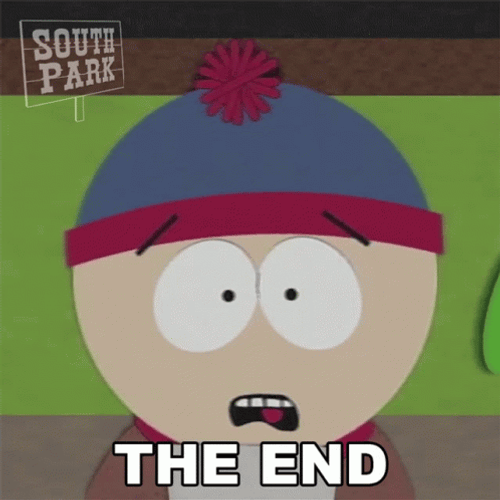
# The END


No covered this time:
- caplog

In [3]:
table_of_contents = [
"# 1. Set the Jupyter environment",
"# 2. Python Mock Object Library",
"## 2.1. What are Mock objects?",
"## 2.2. The Python `Mock` Library",
"# 3. Creating a `Mock` Object",
"## 3.1. Mock object attributes and methods",
"# 4. Mocking",
"## 4.1. Mocking a function",
"## 4.2. Mocking a method of a class",
"## 4.3. Mocking a class",
"## 4.4. Mocking an object's attributes",
"# 5. Assertions and Inspection",
"# 6. return_value and side_effect",
"## 6.1. What if I don't use return_value?",
"## 6.2 Examples and uses",
"### 6.2.1. Chaining method calls",
"### 6.2.2. Testing method calls without caring about return values",
"### 6.2.3. Using side_effect instead of return_value.",
"## 6.2. `side_effect` can also be an iterable",
"## 6.3. Exceptions using `side_effect`",
"# 7. Testing Exceptions with `pytest.raises`",
"# 8. Configuring Your Mock",
"# 9. `patch()`",
"## 9.1. Using `patch()` as a decorator:",
"## 9.2. Using patch() as a context manager:",
"## 9.3. Using patch() manually:",
"# 10. Patching an Object’s Attributes:",
"## 10.1 Patching attributes and functions:",
"## 10.2. Patching classes and instances:",
"## 10.3 Where to Patch",
"# 11. pytest fixtures",
"## 11.1 Basic ficture usage",
"## 11.2 Fixture scope",
"## 11.3. Fixture dependencies",
"## 11.4 Parametrized fixtures",
"## 11.5. Autouse fixtures",    
"# 12. Avoiding Common Problems Using Specifications",
"# 12. MagicMock vs Mock",
"## 12.1. Mocking with `MagicMock`",
"# 13. Best Practices for Mocking and Patching",
"## 13.1. When to use Mock objects and patching",
"## 13.2. Keeping mocks simple and focused",
"## 13.3. Testing edge cases and exceptions with `side_effect`",
"## 13.4. Cleaning up after patching"
]

for i in table_of_contents:
    if i.startswith('# '):
        print(f"* [{i[2:]}](#{i[2:].replace(' ','-')})")
    elif i.startswith('## '):
        print(f"    * [{i[3:]}](#{i[3:].replace(' ','-')})")
    elif i.startswith('### '):
        print(f"        * [{i[4:]}](#{i[4:].replace(' ','-')})")

* [1. Set the Jupyter environment](#1.-Set-the-Jupyter-environment)
* [2. Python Mock Object Library](#2.-Python-Mock-Object-Library)
    * [2.1. What are Mock objects?](#2.1.-What-are-Mock-objects?)
    * [2.2. The Python `Mock` Library](#2.2.-The-Python-`Mock`-Library)
* [3. Creating a `Mock` Object](#3.-Creating-a-`Mock`-Object)
    * [3.1. Mock object attributes and methods](#3.1.-Mock-object-attributes-and-methods)
* [4. Mocking](#4.-Mocking)
    * [4.1. Mocking a function](#4.1.-Mocking-a-function)
    * [4.2. Mocking a method of a class](#4.2.-Mocking-a-method-of-a-class)
    * [4.3. Mocking a class](#4.3.-Mocking-a-class)
    * [4.4. Mocking an object's attributes](#4.4.-Mocking-an-object's-attributes)
* [5. Assertions and Inspection](#5.-Assertions-and-Inspection)
* [6. return_value and side_effect](#6.-return_value-and-side_effect)
    * [6.1. What if I don't use return_value?](#6.1.-What-if-I-don't-use-return_value?)
    * [6.2 Examples and uses](#6.2-Examples-and-uses)
    